# Demonstrates sampling various combinations of applying colors from a specific palette to the chains of a large macrmolecular complex

This notebook will demonstrate automated coloring of a complex with a lot of chains by various combinations from a set palette using binderized PyMol. Random shuffles of your color palette will be cycled to color all the chains and metals.The idea being you can find a per chains/metals color list that matches your needs or at least is close. The color lists for the corresponding are generated in a text file as the images are produced. The 'one' closest to what you want you can than use as a basis for further modification. 

This builds on all the previous demos plus rather advanced usage of Python and Jupyter notebook magics, and so you should be familiar with the previous demos at least and then play around.

As it relies on colors a lot, you should see [Demo of Dealing with PyMol colors](notebooks/demo_colors.ipynb).

Return to [the first page](index.ipynb) for a list of the demonstrations available.

The code is set up to be general. You can run it with the defaults now and it should work. With a little change to the specified places, you can make it address your favorite structure and colors.

----

<div class="alert alert-block alert-warning">
<p>If you haven't used one of these notebooks before, they're basically web pages in which you can write, edit, and run live code. They're meant to encourage experimentation, so don't feel nervous. Just try running a few cells and see what happens!.</p>

<p>
    Some tips:
    <ul>
        <li>Code cells have boxes around them. When you hover over them a <i class="fa-step-forward fa"></i> icon appears.</li>
        <li>To run a code cell either click the <i class="fa-step-forward fa"></i> icon, or click on the cell and then hit <b>Shift+Enter</b>. The <b>Shift+Enter</b> combo will also move you to the next cell, so it's a quick way to work through the notebook.</li>
        <li>While a cell is running a <b>*</b> appears in the square brackets next to the cell. Once the cell has finished running the asterix will be replaced with a number.</li>
        <li>In most cases you'll want to start from the top of notebook and work your way down running each cell in turn. Later cells might depend on the results of earlier ones.</li>
        <li>To edit a code cell, just click on it and type stuff. Remember to run the cell once you've finished editing.</li>
    </ul>
</p>
</div>


---

## Preparation

First things first. You'll need a structure. (For testing, leave the one defined below. Later, change the alpha-numeric id code to be your favorite from [here](www.rcsb.org).) Running the next cell will specify that.

In [1]:
PDB_id_code = '6q9b'

Now you'll need to specify a palette of colors to iterate over applying them to various chains in various combinations.  
You don't need the number of colors to match the number of chains the chains. The idea here is that if the list of colors is less than the number of metals and chains, the list will be cycled around and around again to account for coloring all the chains and metals. If you did want to specify an amount of colors to match the amount of chains and metals, you could do that as well. Or if you supply more colors than needed, then all images produced will only use a subset of the supplied colors.

Running the next cell will specify the colors.

In [2]:
my_colors_as_strings = ["slate","violet","violetpurple","lightblue","my_color","Gray30","white"]

Most of the colors used in this demonstration are inherited from Pymol itself, see [Demo of Dealing with PyMol colors](notebooks/demo_colors.ipynb). However, for one color we'll use the methods outlined in [Demo of Dealing with PyMol colors](notebooks/demo_colors.ipynb) to specify a custom color. The critical point is that for each custom color listed here, you need to specify it in the large code black below. The specific line necessary here is the following:

```python
cmd.set_color ("my_color", [*hex_to_rgb("#7D80B0")])
````

You may wish to expand the amount of custom colors to match your needs later.

You'll need to specify an orientation for the molecule unless you want the default way it was specified. See [Demo of Setting an Orientation](notebooks/demo_orient.ipynb) if how to do that is unclear to you.

In [3]:
orientation_string = "-0.984500647, 0.043761615, 0.169820756, 0.167749062, 0.517372191, 0.839159250, -0.051139157, 0.854639351, -0.516694129, 0.000000000, 0.000000000, -623.999755859, 376.089996338, 316.122253418, 360.227386475, 491.966186523, 756.033325195, -20.000000000"

The following will specify how many shuffles of the combinations you want to run through for sampling.

In [2]:
shuffles_to_do = 20

With the structure,color list, orientation, and amount of shuffles set, the code below can be used to make samples of colors applied to various chains.

## Iterating over combinations applied to chains from a set color palette

Like in other notebooks, a code block is sent to PyMol. The code block is stored as a doc string, which is a fancy way of saying text between `'''`. Here the code block is rather large because of the complexity happening to examine the structure for the number of chains and metals and then applying color from a palette to that, and iterate over it shuffling the combinations applied. Before it is sent to PyMol, that code block is further edited to incorporate settings from above. (*Remember: if you apply additional custom colors, you'll need the follow the example from `my_color` to add assignment of any listed colors to the block as well.)

In [5]:
text_2_save_templ = '''#!/usr/bin/python

import sys, os

# pymol environment
moddir='/opt/pymol-svn/modules'
sys.path.insert(0, moddir)
os.environ['PYMOL_PATH'] = os.path.join(moddir, 'pymol/pymol_path')

import pymol
cmd = pymol.cmd
# end of set-up



# get the structure & load it into PyMol
cmd.fetch('the_STRUCTURE_PLACEHOLDER')
cmd.zoom()

# set my preferred starting point for representation
cmd.set ("ray_opaque_background", 0)
cmd.set ("cartoon_fancy_helices", 1)
cmd.bg_color ("white")
cmd.set ("cartoon_side_chain_helper", "on")
cmd.hide ("everything", "all")

#set desired orientation
def set_my_view():
    cmd.set_view("the_ORIENTATION_PLACEHOLDER")
set_my_view()

# Generate an image for a few color combinations ( NOT ALL)
number_shuffles_to_run = the_SHUFFLE_NUMBER_PLACEHOLDER

# define any custom colors
def hex_to_rgb(value):
    #based on https://stackoverflow.com/a/214657/8508004
    value = value.lstrip('#')
    lv = len(value)
    return tuple(int(value[i:i + lv // 3], 16) for i in range(0, lv, lv // 3))
cmd.set_color ("my_color", [*hex_to_rgb("#7D80B0")])

# specify the palette of colors to use
color_list = the_COLOR_LIST_PLACEHOLDER

# determine ids of loaded chains, see `iterating over residue secondary structure and color.md`
names_of_structures_loaded = cmd.get_names()
the_chains = cmd.get_chains(names_of_structures_loaded[0])
print ("There are {} chains.".format(len(the_chains)))
stored.elems = []
cmd.iterate ("metals", "stored.elems.append(elem)")
the_metals = list(set(stored.elems))
if the_metals:
    print ("There are {} metal ions.".format(len(the_metals)))
the_chains_n_metals = the_chains + the_metals

the_chains_as_selections = ["chain {}".format(x) for x in the_chains]
the_metals_as_selections = ["resn {}".format(x) for x in the_metals]
items_to_color = the_chains_as_selections + the_metals_as_selections

#base display styling
cmd.show ("surface", "polymer.protein")
#show metals as speheres
for sm in the_metals_as_selections:
    cmd.show ("spheres", sm)
cmd.set ("fog_start", 0.70) #move fog back farther so not hitting main part as much

import random
from itertools import cycle
f=open('color_lists.txt','w') 
for x in range(number_shuffles_to_run):
    random.seed(x)
    random.shuffle(color_list)
    pymol_colors = cycle(color_list)
    applied = []
    for i in items_to_color:
        clr_4_now = next(pymol_colors)
        cmd.color(clr_4_now,i)
        applied.append((i,clr_4_now))
    cmd.png("img_{}.png".format(x), width=500, height=500, dpi=72, ray=1, quiet=0)
    f.write("seed {}: {}\\n".format(x,applied)) #note double 
    # backslash to escape necessary or get `SyntaxError: EOL while scanning string 
    # literal` when hit that line
    f.flush();os.fsync(f.fileno()) #added so even if task gets killed, I get 
    # color list for what processed thus far; based on 
    #https://stackoverflow.com/a/19756479/8508004
f.close()
'''
text_2_save = text_2_save_templ.replace("the_STRUCTURE_PLACEHOLDER",PDB_id_code)
text_2_save = text_2_save.replace("the_COLOR_LIST_PLACEHOLDER",str(my_colors_as_strings))
text_2_save = text_2_save.replace("the_ORIENTATION_PLACEHOLDER",orientation_string)
text_2_save = text_2_save.replace("the_SHUFFLE_NUMBER_PLACEHOLDER",str(shuffles_to_do))
%store text_2_save > script.py
!pymol -cq script.py

Writing 'text_2_save' (str) to file 'script.py'.
 ExecutiveLoad-Detail: Detected mmCIF
There are 29 chains.
 Ray: render time: 83.30 sec. = 43.2 frames/hour (83.30 sec. accum.).
 ScenePNG: wrote 500x500 pixel image to file "img_0.png".
 Ray: render time: 74.09 sec. = 48.6 frames/hour (157.40 sec. accum.).
 ScenePNG: wrote 500x500 pixel image to file "img_1.png".
 Ray: render time: 76.62 sec. = 47.0 frames/hour (234.02 sec. accum.).
 ScenePNG: wrote 500x500 pixel image to file "img_2.png".
 Ray: render time: 72.98 sec. = 49.3 frames/hour (307.00 sec. accum.).
 ScenePNG: wrote 500x500 pixel image to file "img_3.png".
 Ray: render time: 72.12 sec. = 49.9 frames/hour (379.13 sec. accum.).
 ScenePNG: wrote 500x500 pixel image to file "img_4.png".
 Ray: render time: 73.66 sec. = 48.9 frames/hour (452.79 sec. accum.).
 ScenePNG: wrote 500x500 pixel image to file "img_5.png".
 Ray: render time: 70.31 sec. = 51.2 frames/hour (523.10 sec. accum.).
 ScenePNG: wrote 500x500 pixel image to file "im

To pack up the results, run the next cell:
!tar czf spliceosome_shuffles.tar.gz *.png color_lists.txt

Downloaded that to local machine.

For viewing images, run in a cell:

```python
from IPython.display import Image
from IPython.display import display
img = {}
for x in range(40):
    img[x] = Image(filename="img_{}.png".format(x)) 
    display(img[x])
    print("ABOVE: img_{}.png".format(x))
```

In [6]:
!tar czf color_shuffles.tar.gz *.png color_lists.txt

Download the `color_shuffles.tar.gz` file made to your local computer.

To preview the images produced here, run the next cell.

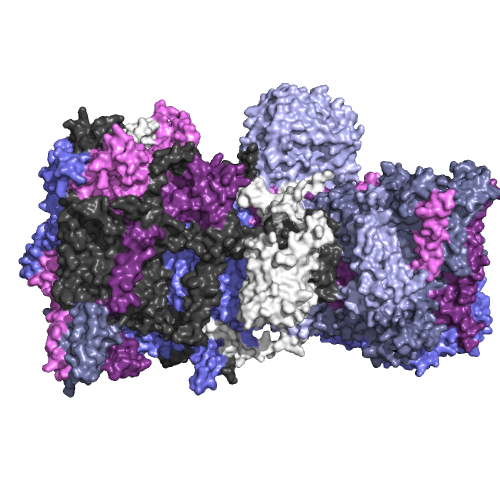

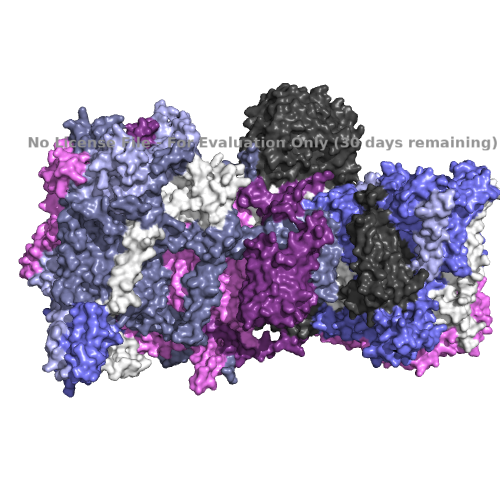

ABOVE: img_0.png
ABOVE: img_1.png


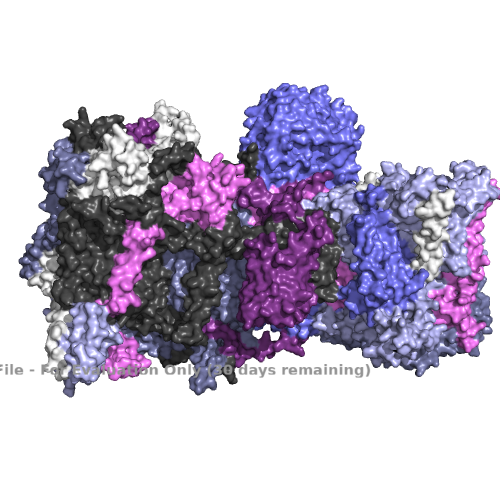

ABOVE: img_2.png


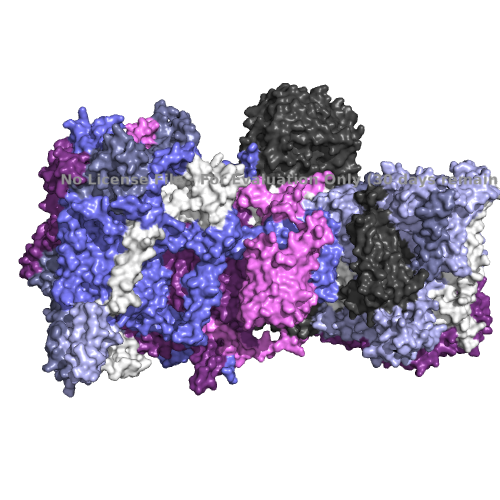

ABOVE: img_3.png


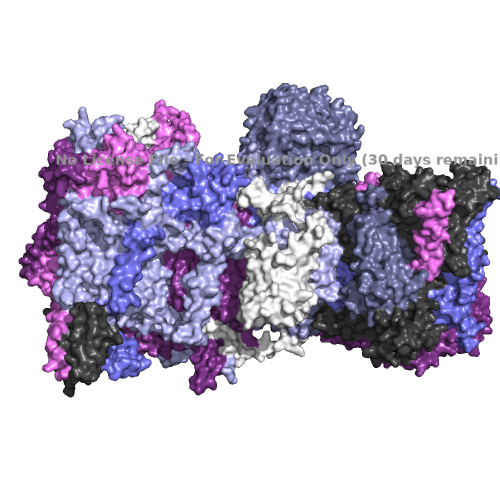

ABOVE: img_4.png


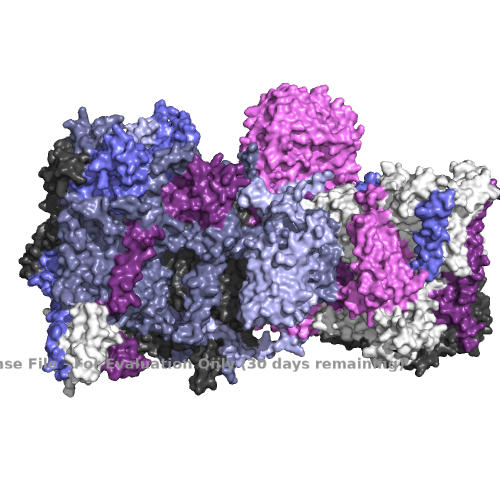

ABOVE: img_5.png


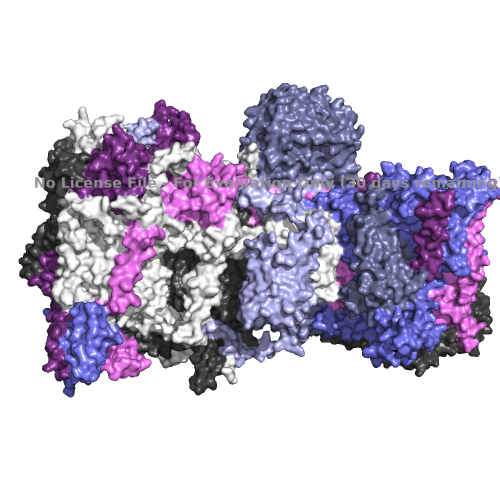

ABOVE: img_6.png


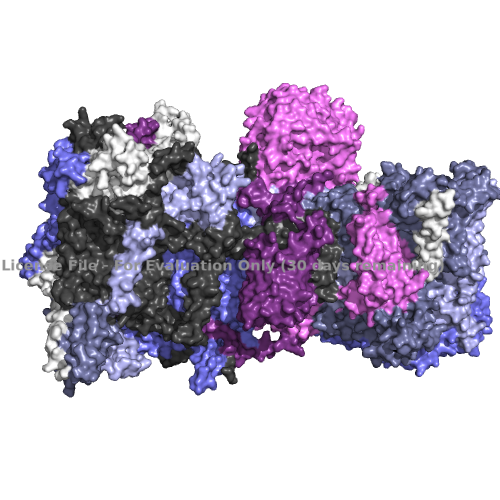

ABOVE: img_7.png


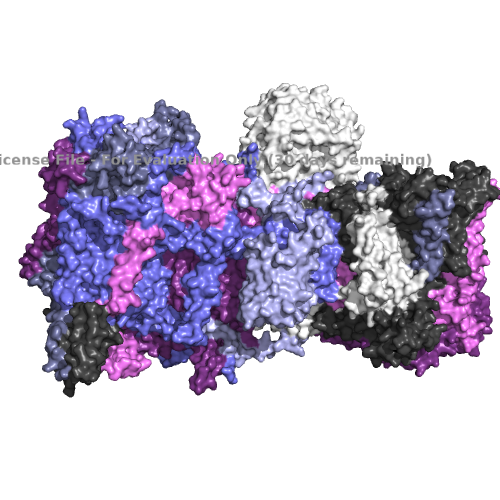

ABOVE: img_8.png


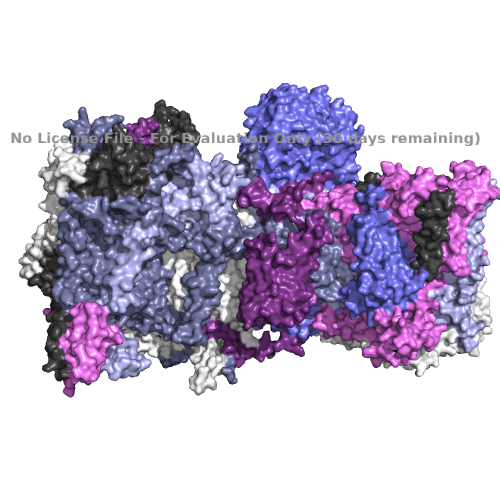

ABOVE: img_9.png


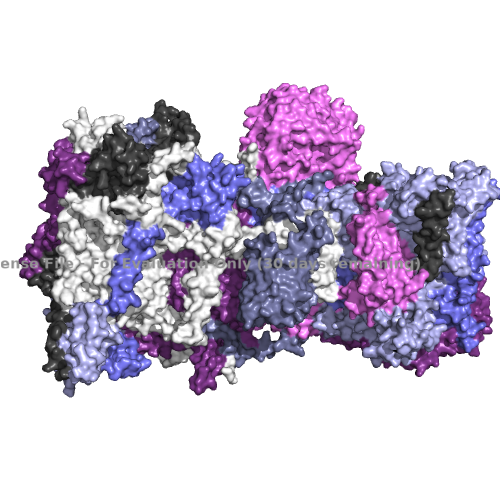

ABOVE: img_10.png


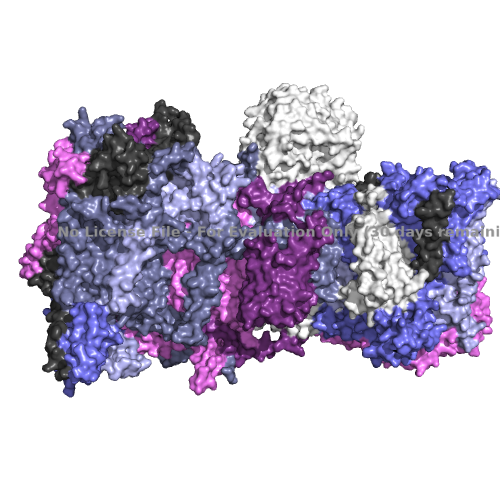

ABOVE: img_11.png


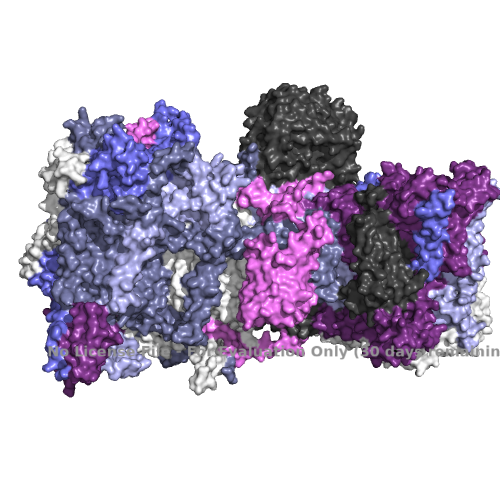

ABOVE: img_12.png


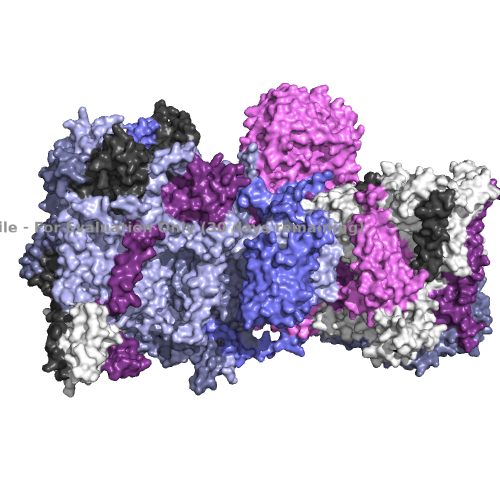

ABOVE: img_13.png


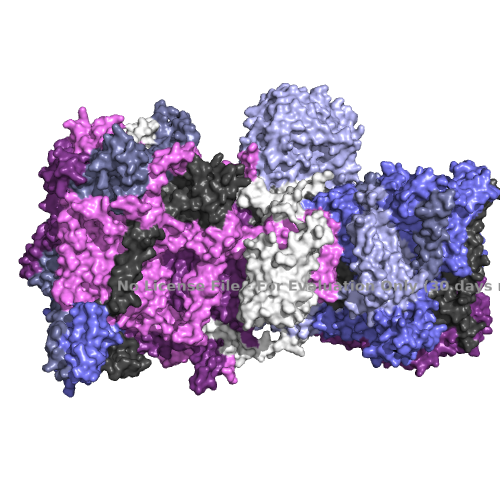

ABOVE: img_14.png


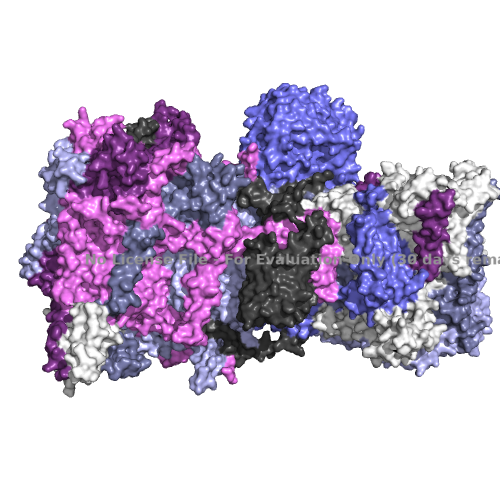

ABOVE: img_15.png


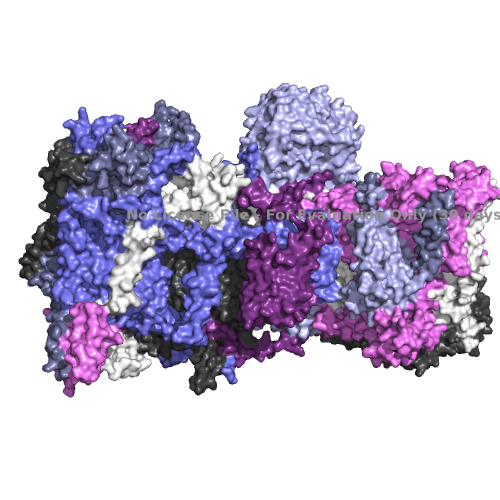

ABOVE: img_16.png


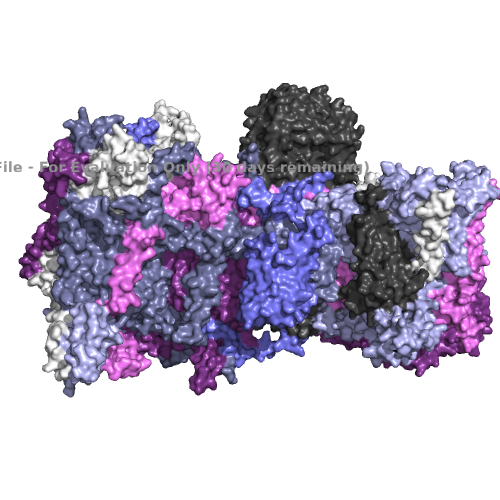

ABOVE: img_17.png


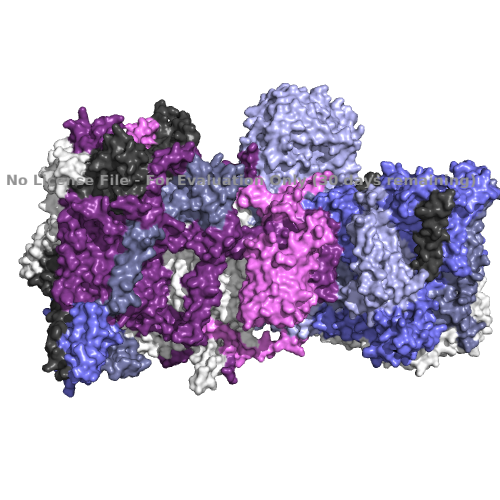

ABOVE: img_18.png


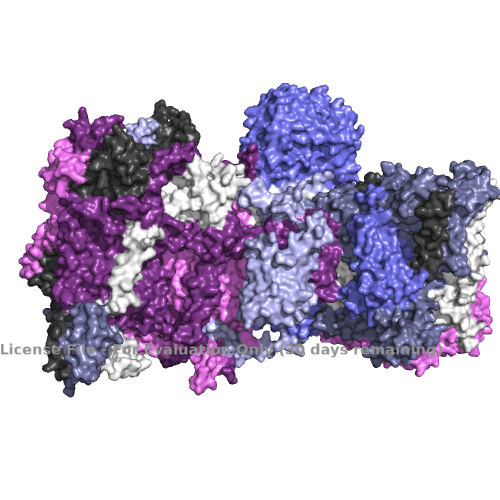

ABOVE: img_19.png


In [7]:
from IPython.display import Image
from IPython.display import display
img = {}
for x in range(shuffles_to_do):
    img[x] = Image(filename="img_{}.png".format(x)) 
    display(img[x])
    print("ABOVE: img_{}.png".format(x))

Or we can cycle through randomly displaying a small subset for a short time to see if any look particularly striking. You may need to zoom out in your browser's view setting to see all three displayed. (This cell will run on and on, and so you'll need to end it running to stop display.)

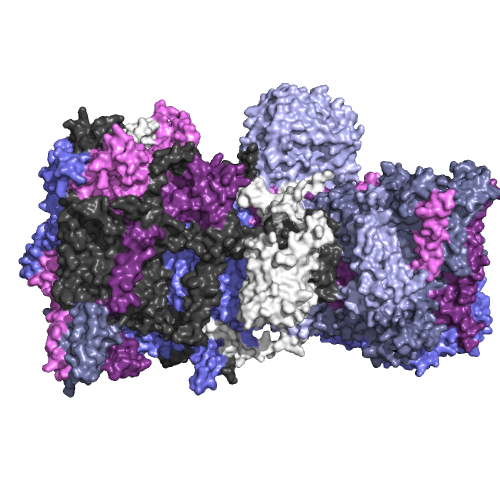

ABOVE: img_0.png


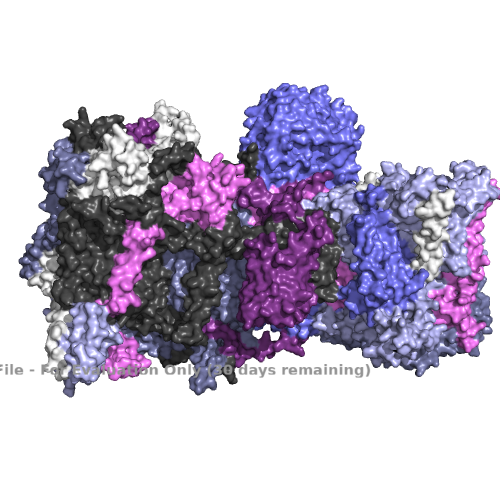

ABOVE: img_2.png


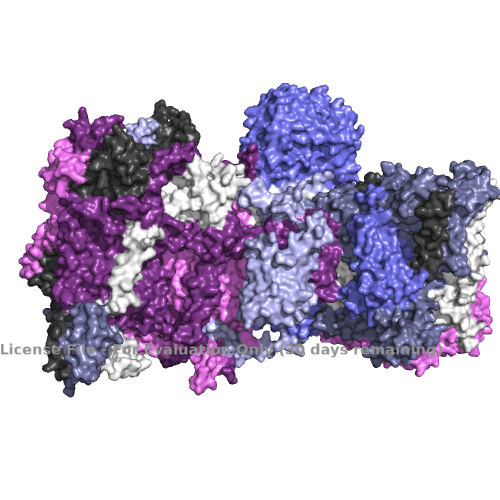

ABOVE: img_19.png


In [ ]:
from IPython.display import Image
from IPython.display import display
from IPython.display import clear_output
import time
import os
import sys
import random
def display_subset():
    img = {}
    for x in random.sample(range(shuffles_to_do), 3):
        img[x] = Image(filename="img_{}.png".format(x)) 
        display(img[x])
        print("ABOVE: img_{}.png".format(x))
    time.sleep(5)
    clear_output(wait=True)
while True:
    display_subset()

----

Return to [the first page](index.ipynb) for a list of the demonstrations available.

----